In [1]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

C:\Users\14437\miniconda3\envs\metrica\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\14437\AppData\Local\Temp\ipykernel_31532\924258231.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("SCMS_Delivery_History_Dataset_20150929.csv", encoding = 'unicode_escape')
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [3]:
# Preprocessing
def preprocess_inputs(df):
    df = df.copy()



    
    return df

In [4]:
X = preprocess_inputs(data)

In [5]:
X

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [6]:
X.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [7]:
{column: len(X[column].unique()) for column in X.select_dtypes('object').columns}

{'Project Code': 142,
 'PQ #': 1237,
 'PO / SO #': 6233,
 'ASN/DN #': 7030,
 'Country': 43,
 'Managed By': 4,
 'Fulfill Via': 2,
 'Vendor INCO Term': 8,
 'Shipment Mode': 5,
 'PQ First Sent to Client Date': 765,
 'PO Sent to Vendor Date': 897,
 'Scheduled Delivery Date': 2006,
 'Delivered to Client Date': 2093,
 'Delivery Recorded Date': 2042,
 'Product Group': 5,
 'Sub Classification': 6,
 'Vendor': 73,
 'Item Description': 184,
 'Molecule/Test Type': 86,
 'Brand': 48,
 'Dosage': 55,
 'Dosage Form': 17,
 'Manufacturing Site': 88,
 'First Line Designation': 2,
 'Weight (Kilograms)': 4688,
 'Freight Cost (USD)': 6733}

In [10]:
def preprocess_inputs(df):
    df = df.copy()
    # Drop ID column
    df = df.drop('ID', axis=1)

    # Drop missing target rows
    missing_target_rows = df[df['Shipment Mode'].isna()].index
    df = df.drop(missing_target_rows, axis = 0).reset_index(drop=True)

    # Fill missing values
    df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

    #Line Item Insurance (USD)
    df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

    # Drop date columns with too many missing values
    df = df.drop(['PQ First Sent to Client Date', 'PO Sent to Vendor Date'], axis = 1)

    # Extract date features
    for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + 'Year'] = df[column].apply(lambda x: x.year)
        df[column + 'Month'] = df[column].apply(lambda x: x.month)
        df[column + 'Day'] = df[column].apply(lambda x: x.day)
        df = df.drop(column, axis=1)

    # Drop numeric columns with too many missing values
    df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)

    # Drop high-cardinality columns
    df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)

    # Binary encoding
    df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
    df['First Line Designation'] = df['First Line Designation'].replace({'No':0,'Yes': 1})

    # One-hot encoding
    for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split df into X and y
    y = df['Shipment Mode']
    X = df.drop('Shipment Mode', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [12]:
X = preprocess_inputs(data)

C:\Users\14437\AppData\Local\Temp\ipykernel_31532\1304187416.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\14437\AppData\Local\Temp\ipykernel_31532\1304187416.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\14437\AppData\Local\Temp\ipykernel_31532\1304187416.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\14437\AppData\Local\Temp\ipykernel_31532\1304187416.py:34: FutureWarning: Downcasting behavior in `replace` i

In [13]:
X

,Fulfill Via,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery DateYear,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
0,0,Air,30,19,551.00,29.00,0.97,1,241.243885,2006,...,False,False,False,False,False,False,False,False,False,False
1,0,Air,240,1000,6200.00,6.20,0.03,1,241.243885,2006,...,False,False,False,False,False,False,False,False,False,False
2,0,Air,100,500,40000.00,80.00,0.80,1,241.243885,2006,...,False,False,False,False,False,False,False,False,False,False
3,0,Air,60,31920,127360.80,3.99,0.07,1,241.243885,2006,...,False,True,False,False,False,False,False,False,False,False
4,0,Air,60,38000,121600.00,3.20,0.05,1,241.243885,2006,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,1,Truck,60,166571,599655.60,3.60,0.06,0,705.790000,2015,...,False,False,False,False,False,False,False,False,False,False
9960,1,Truck,60,21072,137389.44,6.52,0.11,0,161.710000,2015,...,False,False,False,False,False,False,False,False,False,False
9961,1,Truck,30,514526,5140114.74,9.99,0.33,0,5284.040000,2015,...,False,False,False,False,False,False,False,False,False,False
9962,1,Truck,60,17465,113871.80,6.52,0.11,1,134.030000,2015,...,False,False,False,False,False,False,False,False,False,False


In [34]:
def preprocess_inputs(df, label_mapping):
    df = df.copy()
    # Drop ID column
    df = df.drop('ID', axis=1)

    # Drop missing target rows
    missing_target_rows = df[df['Shipment Mode'].isna()].index
    df = df.drop(missing_target_rows, axis = 0).reset_index(drop=True)

    # Fill missing values
    df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

    #Line Item Insurance (USD)
    df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

    # Drop date columns with too many missing values
    df = df.drop(['PQ First Sent to Client Date', 'PO Sent to Vendor Date'], axis = 1)

    # Extract date features
    for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + 'Year'] = df[column].apply(lambda x: x.year)
        df[column + 'Month'] = df[column].apply(lambda x: x.month)
        df[column + 'Day'] = df[column].apply(lambda x: x.day)
        df = df.drop(column, axis=1)

    # Drop numeric columns with too many missing values
    df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)

    # Drop high-cardinality columns
    df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)

    # Binary encoding
    df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
    df['First Line Designation'] = df['First Line Designation'].replace({'No':0,'Yes': 1})

    # One-hot encoding
    for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split df into X and y
    y = df['Shipment Mode']
    X = df.drop('Shipment Mode', axis=1)
    
    # Encode the labels
    y = y.replace(label_mapping)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train =pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test =pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

TypeError: preprocess_inputs() missing 1 required positional argument: 'label_mapping'

In [36]:
X_train

,Fulfill Via,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery DateYear,Scheduled Delivery DateMonth,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
8905,1,60,1419,6385.5,4.50,0.08,1,6.56,2014,9,...,False,False,False,False,False,False,False,False,False,False
1414,1,60,26550,302670.0,11.40,0.19,1,593.23,2009,8,...,False,False,False,False,False,False,False,False,False,False
1409,1,60,40000,284800.0,7.12,0.12,1,558.21,2009,6,...,False,False,False,False,False,False,True,False,False,False
874,0,100,463,64357.0,139.00,1.39,1,102.97,2008,1,...,False,False,False,False,False,False,False,True,False,False
1941,1,30,25000,275000.0,11.00,0.37,1,539.00,2009,5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,60,2160,8532.0,3.95,0.07,0,8.77,2014,10,...,False,False,False,False,False,False,False,False,False,False
7813,1,60,18350,44774.0,2.44,0.04,1,62.77,2012,9,...,False,False,False,False,False,False,False,False,False,False
905,0,30,83400,931578.0,11.17,0.37,1,1490.52,2008,9,...,False,False,False,False,False,False,False,False,False,False
5192,0,100,7243,644627.0,89.00,0.89,1,1389.82,2010,11,...,False,False,False,False,False,False,False,False,False,False


In [17]:
y_train

8905          Truck
1414    Air Charter
1409    Air Charter
874             Air
1941    Air Charter
           ...     
2895          Ocean
7813          Truck
905             Air
5192            Air
235             Air
Name: Shipment Mode, Length: 6974, dtype: object

In [18]:
y_train.value_counts()

Shipment Mode
Air            4317
Truck          1950
Air Charter     449
Ocean           258
Name: count, dtype: int64

In [19]:
y_train.value_counts().index

Index(['Air', 'Truck', 'Air Charter', 'Ocean'], dtype='object', name='Shipment Mode')

In [37]:
LABEL_MAPPING = {
     'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3 
}
X_train, X_test, y_train, y_test = preprocess_inputs(data, label_mapping=LABEL_MAPPING)

C:\Users\14437\AppData\Local\Temp\ipykernel_31532\3654435971.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\14437\AppData\Local\Temp\ipykernel_31532\3654435971.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\14437\AppData\Local\Temp\ipykernel_31532\3654435971.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\14437\AppData\Local\Temp\ipykernel_31532\3654435971.py:34: FutureWarning: Downcasting behavior in `replace` i

In [38]:
X_train

,Fulfill Via,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery DateYear,Scheduled Delivery DateMonth,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
8905,0.975074,-0.228739,-0.426393,-0.442833,-0.365576,-0.221030,0.673216,-0.471452,1.087860,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1414,0.975074,-0.228739,0.198248,0.418854,-0.218907,-0.172736,0.673216,0.702302,-0.994006,0.456201,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1409,0.975074,-0.228739,0.532553,0.366882,-0.309884,-0.203468,0.673216,0.632237,-0.994006,-0.152532,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,4.125612,-0.197963,-0.011975,-0.023956
874,-1.025563,0.291362,-0.450154,-0.274234,2.493413,0.354098,0.673216,-0.278564,-1.410379,-1.674365,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,5.051446,-0.011975,-0.023956
1941,0.975074,-0.618816,0.159722,0.338381,-0.227409,-0.093711,0.673216,0.593803,-0.994006,-0.456899,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-1.025563,-0.228739,-0.407975,-0.436590,-0.377267,-0.225420,-1.485408,-0.467031,1.087860,1.064934,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
7813,0.975074,-0.228739,-0.005566,-0.331187,-0.409364,-0.238591,0.673216,-0.358993,0.255114,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
905,-1.025563,-0.618816,1.611276,2.247912,-0.223796,-0.093711,0.673216,2.497515,-1.410379,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
5192,-1.025563,0.291362,-0.281635,1.413370,1.430592,0.134584,0.673216,2.296044,-0.577633,1.369300,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956


In [27]:
y_train

8905    1
1414    2
1409    2
874     0
1941    2
       ..
2895    3
7813    1
905     0
5192    0
235     0
Name: Shipment Mode, Length: 6974, dtype: int64

In [25]:
y_train.value_counts()

Shipment Mode
0    4317
1    1950
2     449
3     258
Name: count, dtype: int64

In [39]:
# Training
X_train.shape


(6974, 771)

In [41]:
inputs = tf.keras.Input(shape=(771, ))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='Val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
    
)



Epoch 1/100


175/175 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.8288 - val_loss: 0.3088 - val_accuracy: 0.8710
Epoch 2/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2396 - accuracy: 0.9048 - val_loss: 0.2835 - val_accuracy: 0.8853
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9197 - val_loss: 0.2856 - val_accuracy: 0.8846
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9193 - val_loss: 0.3052 - val_accuracy: 0.8817
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9240 - val_loss: 0.2919 - val_accuracy: 0.8918
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.9326 - val_loss: 0.2851 - val_accuracy: 0.8832
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9378 - val_loss: 0.2926 - val_accuracy: 0.8

In [42]:
model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


array([[1.4127743e-04, 9.9985814e-01, 9.3612513e-08, 5.0085026e-07],
       [3.8179002e-07, 9.9999964e-01, 1.5838346e-10, 5.5336546e-13],
       [1.0000000e+00, 2.6585150e-08, 1.1576444e-11, 3.5104999e-11],
       ...,
       [1.0000000e+00, 1.3788254e-11, 3.6433068e-24, 4.2832469e-24],
       [1.0000000e+00, 4.2758314e-18, 4.9423696e-27, 1.4194648e-17],
       [1.0000000e+00, 1.9838161e-19, 4.3138739e-18, 2.0542311e-16]],
      dtype=float32)

In [43]:
np.max(model.predict(X_test), axis=1)

94/94 [==============================] - 0s 1ms/step


array([0.99985814, 0.99999964, 1.        , ..., 1.        , 1.        ,
       1.        ], dtype=float32)

In [44]:
np.argmax(model.predict(X_test), axis=1)

94/94 [==============================] - 0s 1ms/step


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
LABEL_MAPPING.values()

dict_values([0, 1, 2, 3])

In [46]:
list(LABEL_MAPPING.values())

[0, 1, 2, 3]

In [47]:
list(LABEL_MAPPING.keys())

['Air', 'Truck', 'Air Charter', 'Ocean']

94/94 [==============================] - 0s 1ms/step
Test Set Accuracy: 90.535116%


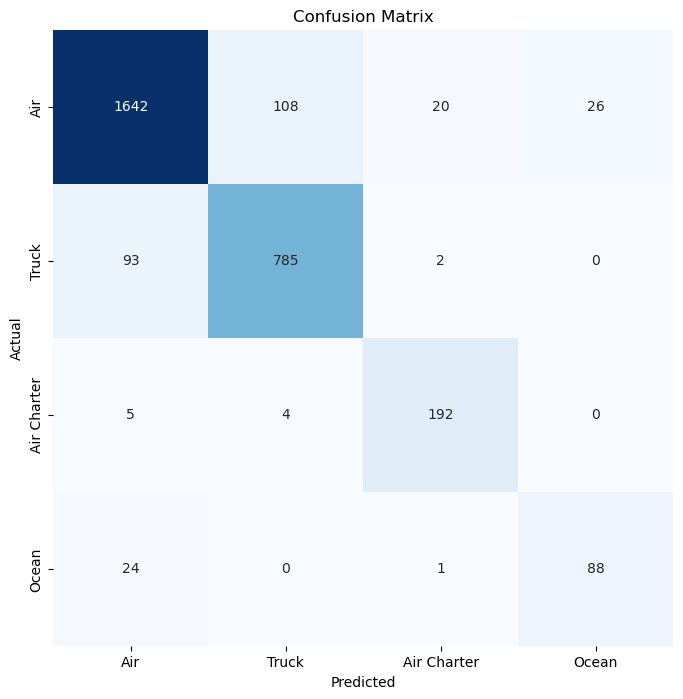

Classification Report:
-----------------------
               precision    recall  f1-score   support

         Air       0.93      0.91      0.92      1796
       Truck       0.88      0.89      0.88       880
 Air Charter       0.89      0.96      0.92       201
       Ocean       0.77      0.78      0.78       113

    accuracy                           0.91      2990
   macro avg       0.87      0.89      0.88      2990
weighted avg       0.91      0.91      0.91      2990



In [49]:
# Results
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

print("Test Set Accuracy: {:2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------\n", clr)